# Steps for Initial Setup -
1. Chose Pyspark kernel in Jupyter Notebook.
2. Verify if SparkContext is available
3. Load the dataset in HDFS or check the path of pre-loaded data in HDFS which is /gldata/Churn.csv and /gldata/Churntest.csv 
   If you want to check the data, access it through Hue- HDFS browser.
4. Learn how to work with Spark Dataframe, Pandas Dataframe and Spark ML Pipeline.

# Steps for Project

1. Create and Check Spark Context for Pyspark shell.
2. Load necessary libraries
3. Check the informtion provided about data.
4. Import the data files provided from HDFS (Churn.csv and Churntest.csv).
5. Display the data in Spark Dataframe. ( Note:: In pyspark, dataframe index the rows from 0 instead of 1)
6. Do data pre-processing required.( Hint - We have some variables which should be of categorical datatype but they are of type integer. Convert them)
7. Do exploratory data analysis.
            7.1 - Describe the data using describe function and state your insights.
            7.2 - Create Histogram for Day minutes spent by customers for churn=0 and 1 values.
            7.3 - Create count plots for Number of customers opt voicemail plan with Churn values.
            7.4 - Create count plots for International Plan opt by customer with Churn values.
            7.5 - Plot Areawise churner and non-churner.
            7.6 - Get correlation matrix using corr() function.
8. Get correlation between Predicting Variable and independent variable and state your insights.
    (Now that we want to predict which customer is going to churn, let’s see what columns might be         interesting for our prediction.One way is to find the correlation between "Churn" and each of         the other columns.This will show us which other columns might predict "Churn" the best.)
9. Applying Machine Learning Model
            9.1 - Import necessary libraries
            9.2 - Create vectors of all indepandant variables (Hint - use VectorAssembler)
            9.3 - Apply Decision Tree Classifier using dependent and independent variables.
            9.4 - Create pipeline to build the classifier.
            9.5 - Use startified sampling to get a sample of data.
            9.6 - Split the data into train and test dataset.
            9.7 - Make predictions and validate your model by calculating accuracy score.
            9.8 - Calculate recall and precision score.
            9.9 - Test the model using test data and calculate accuracy, recall and precision.
            9.10- Repeat steps from 9.3 to 9.9 for Random-forest and Gradient-Boost Classifiers.
10. State your insights and conclusions from the above analysis.
            

# About the Data

The dataset is about telecom industry which tells about the number of customers who churned the service. It consists of 3333 observations having 21 variables. We have to predict which customer is going to churn the service.

Account.Length: how long account has been active.

VMail.Message: Number of voice mail messages send by the customer.

Day.Mins: Time spent on day calls.

Eve.Mins: Time spent on evening calls.

Night.Mins: Time spent on night calls.

Intl. Mins: Time spent on international calls.

Day.Calls: Number of day calls by customers.

Eve.Calls: Number of evening calls by customers.

Intl.Calls: Number of international calls.

Night.Calls: Number of night calls by customer.

Day.Charge: Charges of Day Calls.

Night.Charge: Charges of Night Calls.

Eve.Charge: Charges of evening Calls.

Intl.Charge: Charges of international calls.

VMail.Plan: Voice mail plan taken by the customer or not.

State: State in Area of study.

Phone: Phone number of the customer.

Area.Code: Area Code of customer.

Int.l.Plan: Does customer have international plan or not.

CustServ.Calls: Number of customer service calls by customer.

Churn : Customers who churned the telecom service or who doesn’t(0=“Churner”, 1=“Non-Churner”)

# Get started 

The project can be deivided into 4 blocks. We have added sample solution till step 8 of project. 

You need to proceed for step 8 and 9 to complete this project.

# Loading the Data and Pre-Processing

Follow steps for Project - 1 to 6. 

In [3]:
sc

''

#### Loading Libraries

In [3]:
##We have to load libraries before we start our analysis. 

from pyspark.sql import SparkSession

In [4]:
spark=SparkSession.builder.appName('churn').getOrCreate()

In [5]:
spark

### Import the Data

We have two data files in which training file contains 3333 observations with 21 variables and testing file contains  667 observations. 

In [151]:
ch = spark.read.csv("Churn.csv",header=True,inferSchema=True)

### Display the dataframe
### Note:: In pyspark, dataframe index the rows from 0 instead of 1.   

 

In [152]:
ch.toPandas()

,AccountLength,VMailMessage,DayMins,EveMins,NightMins,IntlMins,CustServCalls,Churn,IntlPlan,VMailPlan,...,DayCharge,EveCalls,EveCharge,NightCalls,NightCharge,IntlCalls,IntlCharge,State,AreaCode,Phone
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,36,156.2,215.5,279.1,9.9,2,0,0,1,...,26.55,126,18.32,83,12.56,6,2.67,AZ,415,414-4276
3329,68,0,231.1,153.4,191.3,9.6,3,0,0,0,...,39.29,55,13.04,123,8.61,4,2.59,WV,415,370-3271
3330,28,0,180.8,288.8,191.9,14.1,2,0,0,0,...,30.74,58,24.55,91,8.64,6,3.81,RI,510,328-8230
3331,184,0,213.8,159.6,139.2,5.0,2,0,1,0,...,36.35,84,13.57,137,6.26,10,1.35,CT,510,364-6381


In [153]:
ch.printSchema()

root
 |-- AccountLength: integer (nullable = true)
 |-- VMailMessage: integer (nullable = true)
 |-- DayMins: double (nullable = true)
 |-- EveMins: double (nullable = true)
 |-- NightMins: double (nullable = true)
 |-- IntlMins: double (nullable = true)
 |-- CustServCalls: integer (nullable = true)
 |-- Churn: integer (nullable = true)
 |-- IntlPlan: integer (nullable = true)
 |-- VMailPlan: integer (nullable = true)
 |-- DayCalls: integer (nullable = true)
 |-- DayCharge: double (nullable = true)
 |-- EveCalls: integer (nullable = true)
 |-- EveCharge: double (nullable = true)
 |-- NightCalls: integer (nullable = true)
 |-- NightCharge: double (nullable = true)
 |-- IntlCalls: integer (nullable = true)
 |-- IntlCharge: double (nullable = true)
 |-- State: string (nullable = true)
 |-- AreaCode: integer (nullable = true)
 |-- Phone: string (nullable = true)



In [154]:
ch.groupBy('Churn').count().show()

+-----+-----+
|Churn|count|
+-----+-----+
|    1|  483|
|    0| 2850|
+-----+-----+



# Data Preprocessing

We have some variables which should be of categorical datatype but they are of type integer. First we have
to convert them into as categorical variable.   

In [36]:
ch=ch.withColumn("Churn",ch.Churn.cast('BOOLEAN'))
ch=ch.withColumn("IntlPlan",ch.IntlPlan.cast('BOOLEAN'))
ch=ch.withColumn("VMailPlan",ch.VMailPlan.cast('BOOLEAN'))

In [155]:
ch.printSchema()

root
 |-- AccountLength: integer (nullable = true)
 |-- VMailMessage: integer (nullable = true)
 |-- DayMins: double (nullable = true)
 |-- EveMins: double (nullable = true)
 |-- NightMins: double (nullable = true)
 |-- IntlMins: double (nullable = true)
 |-- CustServCalls: integer (nullable = true)
 |-- Churn: integer (nullable = true)
 |-- IntlPlan: integer (nullable = true)
 |-- VMailPlan: integer (nullable = true)
 |-- DayCalls: integer (nullable = true)
 |-- DayCharge: double (nullable = true)
 |-- EveCalls: integer (nullable = true)
 |-- EveCharge: double (nullable = true)
 |-- NightCalls: integer (nullable = true)
 |-- NightCharge: double (nullable = true)
 |-- IntlCalls: integer (nullable = true)
 |-- IntlCharge: double (nullable = true)
 |-- State: string (nullable = true)
 |-- AreaCode: integer (nullable = true)
 |-- Phone: string (nullable = true)



# Exploratory Data Analysis

Follow steps 7 and 8.

#### Summary of Dataframe

In pyspark we use 'describe()' to display the summary of variables in dataframe. Also the describe variables doesn't
show the summary of categorical variables in dataframe. We have to explore them explicitly.

In [157]:
ch.toPandas().describe().T

,count,mean,std,min,25%,50%,75%,max
AccountLength,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
VMailMessage,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
DayMins,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
EveMins,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
NightMins,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00
IntlMins,3333.0,10.237294,2.791840,0.00,8.50,10.30,12.10,20.00
CustServCalls,3333.0,1.562856,1.315491,0.00,1.00,1.00,2.00,9.00
Churn,3333.0,0.144914,0.352067,0.00,0.00,0.00,0.00,1.00
IntlPlan,3333.0,0.096910,0.295879,0.00,0.00,0.00,0.00,1.00
VMailPlan,3333.0,0.276628,0.447398,0.00,0.00,0.00,1.00,1.00


From the obtained table we find that, summary of dataframe  includes-

**count**- displaying the number of observations in each variable.

**mean**- the mean value around which each observation lies.

**std**- standard deviation; Its a measure of how much close to the mean value the actual data points are.

**min and max**- displays the maximum and minimum value of a variable in dataframe. e.g. in variable account length the
                 service used by people for minimum 1 day and maximum for 243 days. 

**25%**- it shows the first quartile of variable e.g. if we look at the Account Length then it means 25% of the people used
         service for 74 days, similarly for other variables.

**50%**- it shows second quartile of variable e.g. in the vaiable Account Length then it means 50% of the people used service            for 101 days. 

**75%**- shows the third quartile and 75% of people used service for 127 days. 

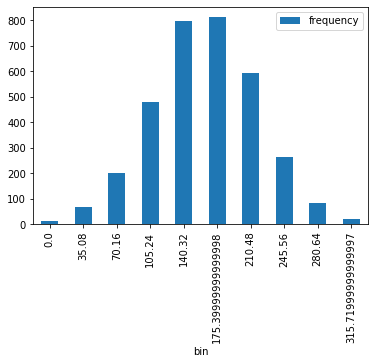

In [172]:
# Doing the heavy lifting in Spark. We could leverage the `histogram` function from the RDD api

gre_histogram = ch.select('DayMins').rdd.flatMap(lambda x: x).histogram(10)

# Loading the Computed Histogram into a Pandas Dataframe for plotting
pd.DataFrame(
    list(zip(*gre_histogram)), 
    columns=['bin', 'frequency']
).set_index(
    'bin'
).plot(kind='bar');

#### Histogram for Day minutes spent by customers

The histogram shows that total day minutes spent by customers on day minutes during their service period.

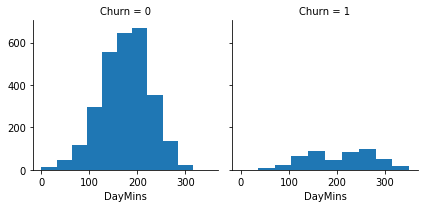

In [165]:
import seaborn as sns
g = sns.FacetGrid(ch.toPandas(), col="Churn")
g.map(plt.hist, "DayMins")


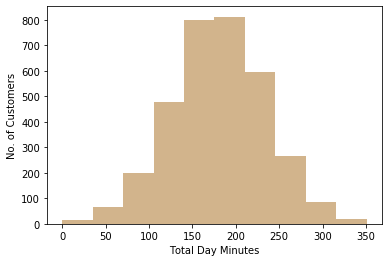

In [171]:
plt.hist(ch.select('DayMins').toPandas()['DayMins'], bins= 10, facecolor= 'tan')
plt.xlabel('Total Day Minutes')
plt.ylabel('No. of Customers')
plt.show()

In the above plot **churn=0** shows **non-churner** and **churn=1** shows **churner**. 

#### Number of customers opt voice mail plan

In [8]:
ch['VMail Plan'].value_counts()

0    2411
1     922
Name: VMail Plan, dtype: int64

In [176]:
ch.groupBy('VMailPlan').count().show()

+---------+-----+
|VMailPlan|count|
+---------+-----+
|        1|  922|
|        0| 2411|
+---------+-----+



We find that 2411 customers who didn't opt the voice mail plan and 922 customers who opted the voice mail plan.   

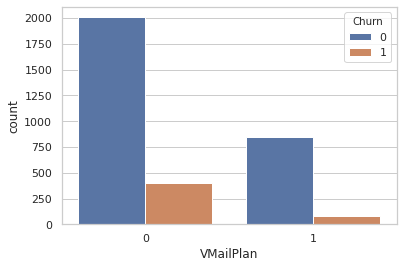

In [177]:
sns.set(style="whitegrid", color_codes=True)
sns.countplot(x="VMailPlan", hue= "Churn", data=ch.toPandas())

#### International Plan opt by customer 

In [180]:
ch.toPandas()['IntlPlan'].value_counts()

0    3010
1     323
Name: IntlPlan, dtype: int64

We find that 3010 customer didn't opt international plan and 323 customers opt the international plan.

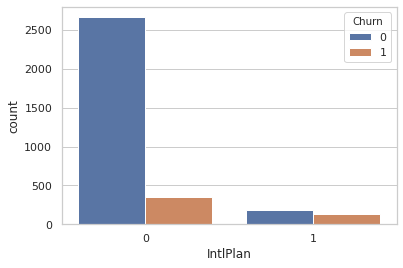

In [181]:
sns.countplot(x="IntlPlan", hue= "Churn", data=ch.toPandas())

#### Areawise churner and non-churner

In [182]:
ch.groupBy('AreaCode').count().show()

+--------+-----+
|AreaCode|count|
+--------+-----+
|     415| 1655|
|     510|  840|
|     408|  838|
+--------+-----+



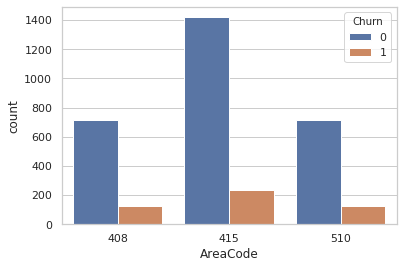

In [183]:
#ch['Area Code']= ch['Area Code'].astype('category')
sns.countplot(x="AreaCode", hue= "Churn", data=ch.toPandas())

#### Correlation Matrix

In [184]:
ch.toPandas().corr('pearson')

,AccountLength,VMailMessage,DayMins,EveMins,NightMins,IntlMins,CustServCalls,Churn,IntlPlan,VMailPlan,DayCalls,DayCharge,EveCalls,EveCharge,NightCalls,NightCharge,IntlCalls,IntlCharge,AreaCode
AccountLength,1.000000,-0.004628,0.006216,-0.006757,-0.008955,0.009514,-0.003796,0.016541,0.024735,0.002918,0.038470,0.006214,0.019260,-0.006745,-0.013176,-0.008960,0.020661,0.009546,-0.012463
VMailMessage,-0.004628,1.000000,0.000778,0.017562,0.007681,0.002856,-0.013263,-0.089728,0.008745,0.956927,-0.009548,0.000776,-0.005864,0.017578,0.007123,0.007663,0.013957,0.002884,-0.001994
DayMins,0.006216,0.000778,1.000000,0.007043,0.004323,-0.010155,-0.013423,0.205151,0.049396,-0.001684,0.006750,1.000000,0.015769,0.007029,0.022972,0.004300,0.008033,-0.010092,-0.008264
EveMins,-0.006757,0.017562,0.007043,1.000000,-0.012584,-0.011035,-0.012985,0.092796,0.019100,0.021545,-0.021451,0.007050,-0.011430,1.000000,0.007586,-0.012593,0.002541,-0.011067,0.003580
NightMins,-0.008955,0.007681,0.004323,-0.012584,1.000000,-0.015207,-0.009288,0.035493,-0.028905,0.006079,0.022938,0.004324,-0.002093,-0.012592,0.011204,0.999999,-0.012353,-0.015180,-0.005825
IntlMins,0.009514,0.002856,-0.010155,-0.011035,-0.015207,1.000000,-0.009640,0.068239,0.045871,-0.001318,0.021565,-0.010157,0.008703,-0.011043,-0.013605,-0.015214,0.032304,0.999993,-0.018288
CustServCalls,-0.003796,-0.013263,-0.013423,-0.012985,-0.009288,-0.009640,1.000000,0.208750,-0.024522,-0.017824,-0.018942,-0.013427,0.002423,-0.012987,-0.012802,-0.009277,-0.017561,-0.009675,0.027572
Churn,0.016541,-0.089728,0.205151,0.092796,0.035493,0.068239,0.208750,1.000000,0.259852,-0.102148,0.018459,0.205151,0.009233,0.092786,0.006141,0.035496,-0.052844,0.068259,0.006174
IntlPlan,0.024735,0.008745,0.049396,0.019100,-0.028905,0.045871,-0.024522,0.259852,1.000000,0.006006,0.003755,0.049398,0.006114,0.019106,0.012451,-0.028913,0.017366,0.045780,0.048551
VMailPlan,0.002918,0.956927,-0.001684,0.021545,0.006079,-0.001318,-0.017824,-0.102148,0.006006,1.000000,-0.011086,-0.001686,-0.006444,0.021559,0.015553,0.006064,0.007618,-0.001276,-0.000747


### Correlation between Predicting Variable and independent variable.

Now that we want to predict which customer is going to churn, let’s see what columns might be interesting for our prediction.
One way is to find the correlation between "Churn" and each of the other columns.
This will show us which other columns might predict "Churn" the best.

In [190]:
ch.toPandas().corr()["Churn"].sort_values()

VMailPlan       -0.102148
VMailMessage    -0.089728
IntlCalls       -0.052844
NightCalls       0.006141
AreaCode         0.006174
EveCalls         0.009233
AccountLength    0.016541
DayCalls         0.018459
NightMins        0.035493
NightCharge      0.035496
IntlMins         0.068239
IntlCharge       0.068259
EveCharge        0.092786
EveMins          0.092796
DayCharge        0.205151
DayMins          0.205151
CustServCalls    0.208750
IntlPlan         0.259852
Churn            1.000000
Name: Churn, dtype: float64

In [186]:
numeric_feature=[t[0] for t in ch.dtypes if t[1]=='int']

In [187]:
numeric_feature

['AccountLength',
 'VMailMessage',
 'CustServCalls',
 'Churn',
 'IntlPlan',
 'VMailPlan',
 'DayCalls',
 'EveCalls',
 'NightCalls',
 'IntlCalls',
 'AreaCode']

In [196]:
ch.columns

['AccountLength',
 'VMailMessage',
 'DayMins',
 'EveMins',
 'NightMins',
 'IntlMins',
 'CustServCalls',
 'Churn',
 'IntlPlan',
 'VMailPlan',
 'DayCalls',
 'DayCharge',
 'EveCalls',
 'EveCharge',
 'NightCalls',
 'NightCharge',
 'IntlCalls',
 'IntlCharge',
 'State',
 'AreaCode',
 'Phone']

In [209]:
ch.createOrReplaceTempView("data")

In [210]:
ch_n=spark.sql("select State,count(*) as CNT,sum(Churn) as SC,sum(Churn)/count(*) as New_var from data group by State order by 4 desc")

In [211]:
ch_n.show()

+-----+---+---+-------------------+
|State|CNT| SC|            New_var|
+-----+---+---+-------------------+
|   CA| 34|  9| 0.2647058823529412|
|   NJ| 68| 18| 0.2647058823529412|
|   TX| 72| 18|               0.25|
|   MD| 70| 17|0.24285714285714285|
|   SC| 60| 14|0.23333333333333334|
|   MI| 73| 16| 0.2191780821917808|
|   MS| 65| 14| 0.2153846153846154|
|   WA| 66| 14|0.21212121212121213|
|   NV| 66| 14|0.21212121212121213|
|   ME| 62| 13|0.20967741935483872|
|   MT| 68| 14|0.20588235294117646|
|   AR| 55| 11|                0.2|
|   KS| 70| 13|0.18571428571428572|
|   NY| 83| 15|0.18072289156626506|
|   MN| 84| 15|0.17857142857142858|
|   PA| 45|  8|0.17777777777777778|
|   MA| 65| 11|0.16923076923076924|
|   CT| 74| 12|0.16216216216216217|
|   NC| 68| 11|0.16176470588235295|
|   NH| 56|  9|0.16071428571428573|
+-----+---+---+-------------------+
only showing top 20 rows



In [212]:
from pyspark.sql.functions import *
from pyspark.sql.window import Window

ranked =  ch_n.withColumn(
  "rank", dense_rank().over(Window.partitionBy("State").orderBy(desc("New_var"))))

In [213]:
windowSpec = Window.orderBy("New_var")
ranked = ch_n.withColumn("rank", row_number().over(windowSpec))

In [214]:
ranked=ranked.select(ranked['State'],ranked['rank'])

In [215]:
ranked.show()

+-----+----+
|State|rank|
+-----+----+
|   HI|   1|
|   AK|   2|
|   AZ|   3|
|   VA|   4|
|   IA|   5|
|   LA|   6|
|   NE|   7|
|   IL|   8|
|   WI|   9|
|   RI|  10|
|   DC|  11|
|   TN|  12|
|   WV|  13|
|   ND|  14|
|   NM|  15|
|   AL|  16|
|   VT|  17|
|   MO|  18|
|   WY|  19|
|   ID|  20|
+-----+----+
only showing top 20 rows



In [216]:
ch.select(ch['State']).show()

+-----+
|State|
+-----+
|   KS|
|   OH|
|   NJ|
|   OH|
|   OK|
|   AL|
|   MA|
|   MO|
|   LA|
|   WV|
|   IN|
|   RI|
|   IA|
|   MT|
|   IA|
|   NY|
|   ID|
|   VT|
|   VA|
|   TX|
+-----+
only showing top 20 rows



In [240]:
ch_new=ch.join(ranked,ch.State==ranked.State,"leftouter")

In [241]:
ch_new.printSchema()

root
 |-- AccountLength: integer (nullable = true)
 |-- VMailMessage: integer (nullable = true)
 |-- DayMins: double (nullable = true)
 |-- EveMins: double (nullable = true)
 |-- NightMins: double (nullable = true)
 |-- IntlMins: double (nullable = true)
 |-- CustServCalls: integer (nullable = true)
 |-- Churn: integer (nullable = true)
 |-- IntlPlan: integer (nullable = true)
 |-- VMailPlan: integer (nullable = true)
 |-- DayCalls: integer (nullable = true)
 |-- DayCharge: double (nullable = true)
 |-- EveCalls: integer (nullable = true)
 |-- EveCharge: double (nullable = true)
 |-- NightCalls: integer (nullable = true)
 |-- NightCharge: double (nullable = true)
 |-- IntlCalls: integer (nullable = true)
 |-- IntlCharge: double (nullable = true)
 |-- State: string (nullable = true)
 |-- AreaCode: integer (nullable = true)
 |-- Phone: string (nullable = true)
 |-- State: string (nullable = true)
 |-- rank: integer (nullable = true)



In [242]:
ch_new=ch_new.drop('Phone','State')

In [243]:
ch_new.printSchema()

root
 |-- AccountLength: integer (nullable = true)
 |-- VMailMessage: integer (nullable = true)
 |-- DayMins: double (nullable = true)
 |-- EveMins: double (nullable = true)
 |-- NightMins: double (nullable = true)
 |-- IntlMins: double (nullable = true)
 |-- CustServCalls: integer (nullable = true)
 |-- Churn: integer (nullable = true)
 |-- IntlPlan: integer (nullable = true)
 |-- VMailPlan: integer (nullable = true)
 |-- DayCalls: integer (nullable = true)
 |-- DayCharge: double (nullable = true)
 |-- EveCalls: integer (nullable = true)
 |-- EveCharge: double (nullable = true)
 |-- NightCalls: integer (nullable = true)
 |-- NightCharge: double (nullable = true)
 |-- IntlCalls: integer (nullable = true)
 |-- IntlCharge: double (nullable = true)
 |-- AreaCode: integer (nullable = true)
 |-- rank: integer (nullable = true)



In [246]:
# Split the dataset randomly into 70% for training and 30% for testing. Passing a seed for deterministic behavior
train, test = ch_new.randomSplit([0.7, 0.3], seed = 0)
print("There are %d training examples and %d test examples." % (train.count(), test.count()))

There are 2279 training examples and 1054 test examples.


In [ ]:
train

In [270]:
vector_col = "Churn_new"
featuresCols = train.columns
featuresCols.remove('Churn')
assembler = VectorAssembler(inputCols=featuresCols, outputCol=vector_col)



In [269]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages=[assembler])

In [271]:
pipelineModel = pipeline.fit(train)

In [275]:
train_new = pipelineModel.transform(train)
test_new = pipelineModel.transform(test)

In [288]:
train_new=train_new.withColumnRenamed('Churn', 'label')

In [289]:
test_new=test_new.withColumnRenamed('Churn', 'label')

In [290]:
test_new.printSchema()

root
 |-- AccountLength: integer (nullable = true)
 |-- VMailMessage: integer (nullable = true)
 |-- DayMins: double (nullable = true)
 |-- EveMins: double (nullable = true)
 |-- NightMins: double (nullable = true)
 |-- IntlMins: double (nullable = true)
 |-- CustServCalls: integer (nullable = true)
 |-- label: integer (nullable = true)
 |-- IntlPlan: integer (nullable = true)
 |-- VMailPlan: integer (nullable = true)
 |-- DayCalls: integer (nullable = true)
 |-- DayCharge: double (nullable = true)
 |-- EveCalls: integer (nullable = true)
 |-- EveCharge: double (nullable = true)
 |-- NightCalls: integer (nullable = true)
 |-- NightCharge: double (nullable = true)
 |-- IntlCalls: integer (nullable = true)
 |-- IntlCharge: double (nullable = true)
 |-- AreaCode: integer (nullable = true)
 |-- rank: integer (nullable = true)
 |-- Churn_new: vector (nullable = true)



# Building Machine Learning Model

Follow project step - 9

In [291]:
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(featuresCol = 'Churn_new', labelCol = 'label', maxDepth = 3)
dtModel = dt.fit(train_new)
predictions = dtModel.transform(train_new)


In [293]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.2902547441243979


In [294]:
predictions = dtModel.transform(test_new)

In [295]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.2824727238525207


## Random Forest

In [298]:
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(featuresCol = 'Churn_new', labelCol = 'label')
rfModel = rf.fit(train_new)
predictions = rfModel.transform(test_new)

In [303]:
predictions = rfModel.transform(test_new)
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.9128036654842511


In [300]:
predictions = rfModel.transform(train_new)
evaluator = BinaryClassificationEvaluator()
print("train Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

train Area Under ROC: 0.9405820644619022


In [304]:
results = predictions.select(['prediction', 'label'])

In [316]:
results=results.toPandas()

## Precision, Recall and Accuracy Score

In [318]:
from sklearn.metrics import precision_score,accuracy_score,recall_score

In [319]:
precision_score(results['label'],results['prediction'])

0.9666666666666667

In [320]:
recall_score(results['label'],results['prediction'])

0.5178571428571429

In [321]:
accuracy_score(results['label'],results['prediction'])

0.920303605313093

# Insights and Conclusions

Follow step no 10 of Project.

Since only 16% has churn the model has high precision and low recall 